# Exercise 2
Alexander Hatle

From heat_forweauler.ipynb:

In [4]:
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
from matplotlib import cm
plt.rcParams.update(newparams)

In [5]:
def tridiag(v, d, w, N):
    # Help function 
    # Returns a tridiagonal matrix A=tridiag(v, d, w) of dimension N x N.
    e = np.ones(N)        # array [1,1,...,1] of length N
    A = v*np.diag(e[1:],-1)+d*np.diag(e)+w*np.diag(e[1:],1)
    return A

In [6]:
def forward_euler(g, M=10, N=100, T=0.5):
    # Solve the heat equation
    # u_t=u_xx, 0<=x<=1
    # with boundary conditions u(0,t)=u(1,t)=0
    # and initial values u(x,0)=g(x)
    # over the time interval from 0 to T.
    # Input: 
    #       g: initial function for t=0
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    # Set the stepsizes
    h = 1/M     # Stepsize in space
    k = T/N     # Stepsize in time

    r = k/h**2
    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}, r={:.4f}'.format(h,k,r))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,1,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = g(x)              # Initial values, endpoints included
    
    A = tridiag(r,1-2*r,r,M-1);

    # Main loop 
    for n in range(N):
        U[1:-1, n+1] = A.dot(U[1:-1,n])  # [1:-1] -> excluding endpoints
        # Endpoints stay the same
    return x, t, U

In [7]:
def plot_solution(x, t, U, txt='Solution'):
    # Plot the solution of the heat equation
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    T, X = np.meshgrid(t,x)
    # ax.plot_wireframe(T, X, U)
    ax.plot_surface(T, X, U, cmap=cm.coolwarm)
    ax.view_init(azim=30)              # Rotate the figure
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title(txt);

Using initial solution

$$
u(x,0)=\begin{cases} 2x & 0\le x\le 0.5\\
2(1-x) & 0.5\le x\le 1\end{cases}
$$
And $M=20$,  $N=500$ and $T=0.5$ 

In [8]:
def g2(x):
    M = x.size
    init = np.zeros(x.size)
    init[0 : M//2] = 2 * x[0:M//2]
    init [M//2 : M] = 2 * (1-x[M//2 : M])
    return init

h=0.0500, k=0.0013, r=0.5000


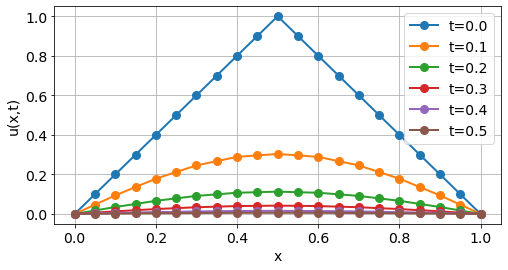

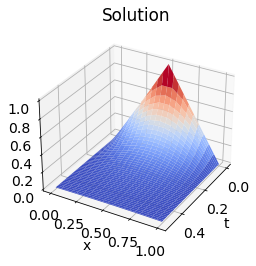

In [9]:
# Solve the equation
x, t, U = forward_euler(g2, M=20, N=400, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

Now with same initial solution but with $N=395$ instead.

## a)

h=0.0500, k=0.0013, r=0.5063


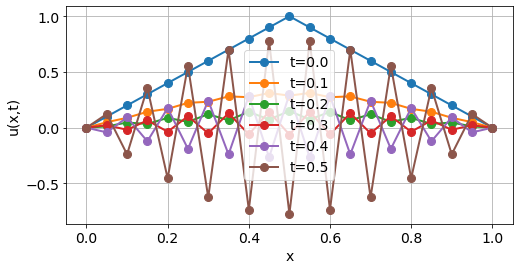

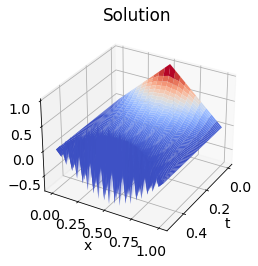

In [10]:
# Solve the equation
x, t, U = forward_euler(g2, M=20, N=395, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

We have defined
$$
r = \frac{k}{h^{2}}= \frac{T/N}{1/M^2} =\frac{M^2T}{N}
$$
Earlier we had
$$
r= \frac{20^{2}\cdot 0.5}{400}=0.5
$$
Which satisfies the stability condition.
Now though,
$$
r= \frac{20^{2}\cdot 0.5}{395}> 0.5
$$
Which does _not_ satisfy the stability condition, as seen in the result.

## b)

In [11]:
def g3(x):
    return np.sin(np.pi * x) + 1

In [12]:
def forward_euler_own(g, M=10, N=100, T=0.5):
    # Solve the heat equation
    # u_t=u_xx, 0<=x<=1
    # with boundary conditions u(0,t)=u(1,t)=0
    # and initial values u(x,0)=g(x)
    # over the time interval from 0 to T.
    # Input: 
    #       g: initial function for t=0
    #       M, N: number of grid intervals in the x- and t directions
    #       T: end of integration
    # Output: 
    #       x, t: the gridpoints in the x- and t- directions 
    #       U: An array with the numerical solution.

    # Set the stepsizes
    h = 1/M     # Stepsize in space
    k = T/N     # Stepsize in time

    r = k/h**2
    # Print the stepsizes, and r=k/h^2.
    print('h={:.4f}, k={:.4f}, r={:.4f}'.format(h,k,r))

    U = np.zeros((M+1,N+1))    # Array to store the solution, boundaries included.
    x = np.linspace(0,1,M+1)   # Gridpoints on the x-axis
    t = np.linspace(0,T,N+1)   # Gridpoints on the t-axis
    U[:,0] = g(x)              # Initial values, endpoints included
    q = np.zeros(M-1)
    q[0] = U[0, 0] * r
    q[-1] = U[-1, 0] * r

    
    Ch = np.eye(M-1) + r * tridiag(1,-2,1,M-1);

    # Main loop 
    for n in range(N):
        U[1:-1, n+1] = Ch.dot(U[1:-1,n]) + q  # [1:-1] -> excluding endpoints
        #U[:,n+1] = U[:,n+1] + q
        # Endpoints stay the same
    return x, t, U

h=0.0500, k=0.0013, r=0.5000


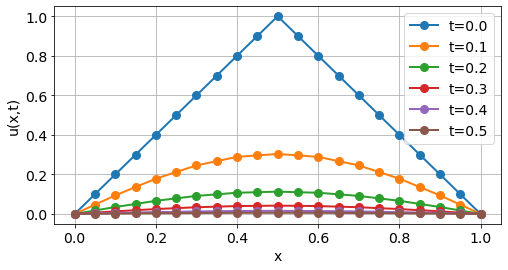

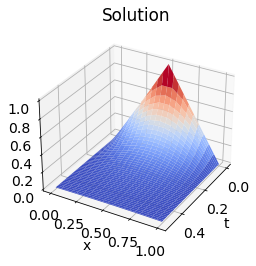

In [13]:
# Solve the equation
x, t, U = forward_euler_own(g2, M=20, N=400, T=0.5)

# Plot the solution at some points in time
plt.figure(1)
plt.clf()
tplots = np.linspace(0,t[-1],6)
k = t[1]-t[0]
for tn in tplots:
    n = int(tn/k)
    tn = n*k
    plt.plot(x,U[:,n],'-o',label='t={:.1f}'.format(tn))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.show()

# Make a 3-d plot
plot_solution(x, t, U, txt='Solution')
plt.show()

## 1c)
We want to solve the heat equation for
$$\begin{align*}
u_{t}&=u_{xx}\\
u(x,0) &= \text{sin}(\pi x)\\
\end{align*}$$
We assume that 
$$u(x,t)= G(t)\text{sin}(\pi x)$$
Then
$$\begin{align*}
u_{t}&= G'(t)\text{sin}(\pi x)\\
=u_{xx}&= -\pi^{2}G(t)\text{sin}(\pi x)\\
G'(t)&= -\pi^{2}G(t)\\
G(t)&= Ce^{-\pi^{2}t}\\
u(x,t) &= Ce^{-\pi^{2}t}\text{sin}(\pi x)
\end{align*}$$
Using $u(x,0)=\text{sin}(\pi x)$ we get that $C=1$ and
$$u(x,t)=e^{-\pi^{2}t}\text{sin}(\pi x)$$


In [14]:
def u0(x):
    return np.sin(np.pi * x)

def u_exact(x,t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

### 1c1) Error as function of $h$

h=0.5000, k=0.0000, r=0.0000
h=0.2500, k=0.0000, r=0.0002
h=0.1250, k=0.0000, r=0.0006
h=0.0625, k=0.0000, r=0.0026
h=0.0312, k=0.0000, r=0.0102
h=0.0156, k=0.0000, r=0.0410


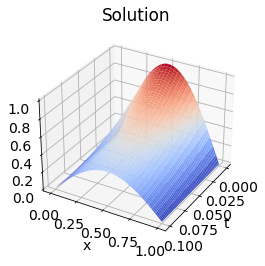

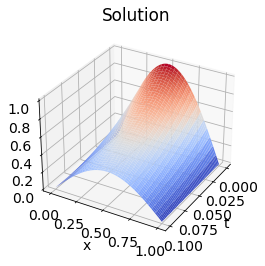

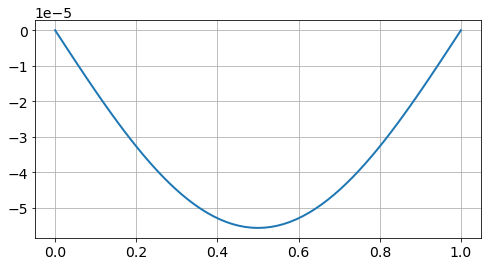

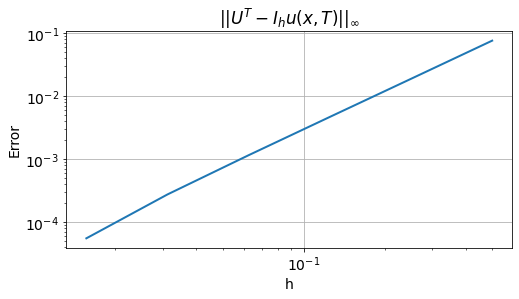

In [64]:
T = 0.1
N = 10000
K = 6
error_h = np.zeros(K)
hs = np.zeros(K)

for k in range(1, K+1):
    M = 2**k
    x, t, U = forward_euler_own(u0, M = M, N = N, T = T)
    
    tt, xx = np.meshgrid(t, x)
    '''print("x=",xx.shape)
    print("t", tt.shape)
    print("uex", u_exact(xx, tt).shape)
    print("U", U.shape)'''
    error_h[k-1]= np.max(np.abs(u_exact(x, t[-1]) - U[:,-1]))
    hs[k-1] = 1/M

plot_solution(x, t, U, txt='Solution')
plot_solution(x, t, u_exact(xx,tt), txt='Solution')
plt.show()
plt.plot(x, u_exact(x, t[-1]) - U[:,-1])
plt.show()


plt.figure(0)
plt.loglog(hs, error_h)
plt.xlabel('h')
plt.ylabel('Error')
plt.title(r'$||U^T-I_hu(x,T)||_\infty$')
plt.show()
    